Преподаватель: Вячеслав Потапов
Итоговая работа по курсу «Python и математика для анализа данных»

Проектная работа по модулю “Математика и статистика в Python”

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import classification_report

%matplotlib inline



1.Загрузить файл hr.csv.

In [2]:
import io
import requests
url="HR.csv"
data=pd.read_csv(url) 
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
data.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [5]:
data.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [6]:
data.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [7]:
import statistics

In [8]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [9]:
data.quantile([0.25,0.5,0.75])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0.25,0.44,0.56,3.0,156.0,3.0,0.0,0.0,0.0
0.50,0.64,0.72,4.0,200.0,3.0,0.0,0.0,0.0
0.75,0.82,0.87,5.0,245.0,4.0,0.0,0.0,0.0


In [10]:
np.std(data)

satisfaction_level        0.248622
last_evaluation           0.171163
number_project            1.232551
average_montly_hours     49.941434
time_spend_company        1.460088
Work_accident             0.351707
left                      0.425910
promotion_last_5years     0.144277
dtype: float64

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

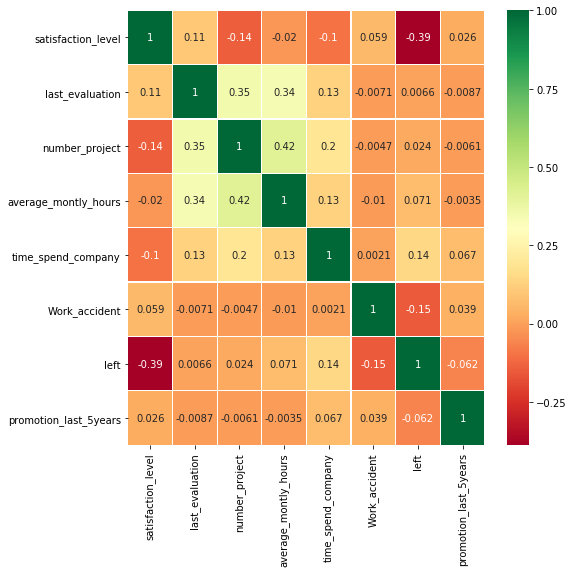

In [11]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

4.Визуализировать несколько взаимосвязей между переменными.

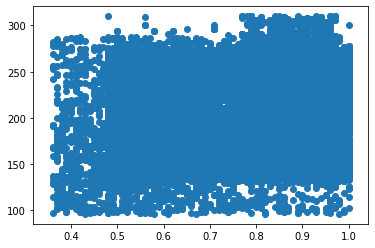

In [12]:
plt.scatter(data['last_evaluation'], data['average_montly_hours'])
plt.show()

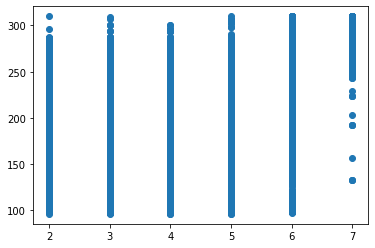

In [13]:
plt.scatter(data['number_project'], data['average_montly_hours'])
plt.show()

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [14]:
num_ = data['number_project']

hours = data['average_montly_hours']

stats.ttest_ind(num_, hours)

Ttest_indResult(statistic=-483.54229603425085, pvalue=0.0)

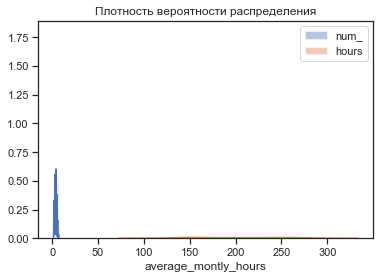

In [30]:
sns.distplot(num_)
sns.distplot(hours)
plt.title('Плотность вероятности распределения')
plt.legend(['num_', 'hours'])
plt.show()

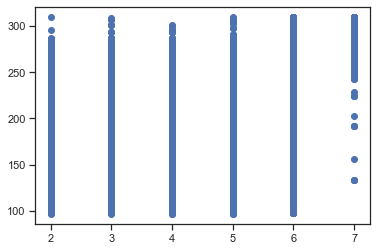

In [32]:
plt.scatter(num_, hours)
plt.show()

Видна некая зависимость между номерами проектов и средним выработанным кол часов в месяц. На проектах с бОльшим номером сотрудники работали в средним бОльшее кол часов. И на проекте с номером 2 видно смещение кол ср часов к нижней границе.

In [15]:
satis = data['satisfaction_level']

left_ = data['left']

stats.ttest_ind(satis, left_
               )

Ttest_indResult(statistic=93.06077566920372, pvalue=0.0)

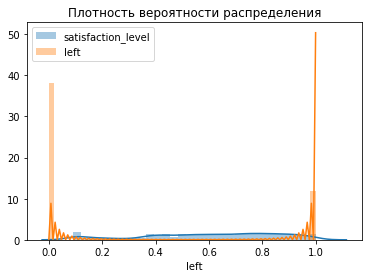

In [16]:
sns.distplot(satis)
sns.distplot(left_)
plt.title('Плотность вероятности распределения')
plt.legend(['satisfaction_level', 'left'])
plt.show()

6.Рассчитать сколько работников работает в каждом департаменте.

In [17]:
data.groupby('sales', as_index=False).count()

,sales,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
1,RandD,787,787,787,787,787,787,787,787,787
2,accounting,767,767,767,767,767,767,767,767,767
3,hr,739,739,739,739,739,739,739,739,739
4,management,630,630,630,630,630,630,630,630,630
5,marketing,858,858,858,858,858,858,858,858,858
6,product_mng,902,902,902,902,902,902,902,902,902
7,sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
8,support,2229,2229,2229,2229,2229,2229,2229,2229,2229
9,technical,2720,2720,2720,2720,2720,2720,2720,2720,2720


7.Показать распределение сотрудников по зарплатам.

In [18]:
data.groupby('salary', as_index=False).count()

,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales
0,high,1237,1237,1237,1237,1237,1237,1237,1237,1237
1,low,7316,7316,7316,7316,7316,7316,7316,7316,7316
2,medium,6446,6446,6446,6446,6446,6446,6446,6446,6446


In [19]:

a=0
for i in data['salary']:
    if i =='low':
        data['salary'][a]=0
    elif i=='medium':
        data['salary'][a]=1
    else: data['salary'][a]=2
    a+=1
data.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


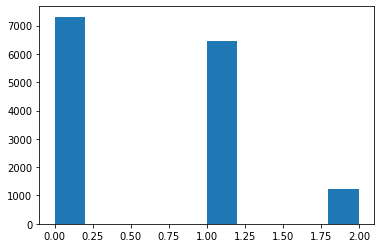

In [20]:
plt.hist(data['salary'])
plt.show()

In [21]:
gr1=data.groupby('sales', as_index=False).count()
gr1

,sales,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
1,RandD,787,787,787,787,787,787,787,787,787
2,accounting,767,767,767,767,767,767,767,767,767
3,hr,739,739,739,739,739,739,739,739,739
4,management,630,630,630,630,630,630,630,630,630
5,marketing,858,858,858,858,858,858,858,858,858
6,product_mng,902,902,902,902,902,902,902,902,902
7,sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
8,support,2229,2229,2229,2229,2229,2229,2229,2229,2229
9,technical,2720,2720,2720,2720,2720,2720,2720,2720,2720


8.Показать распределение сотрудников по зарплатам совместно с департаментами.

IT


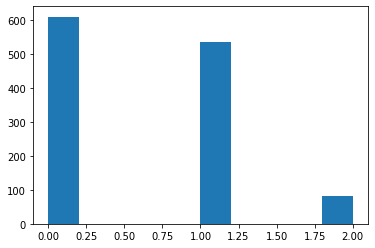

RandD


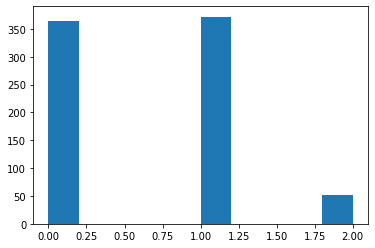

accounting


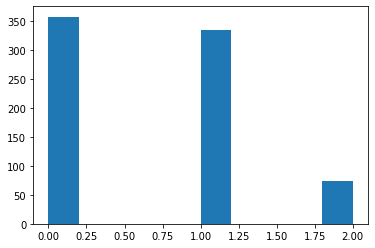

hr


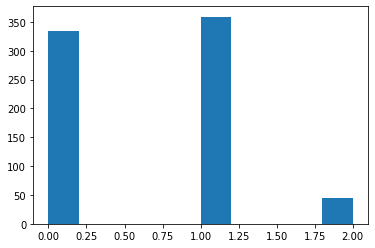

management


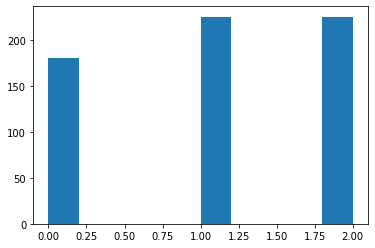

marketing


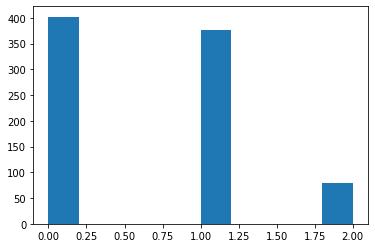

product_mng


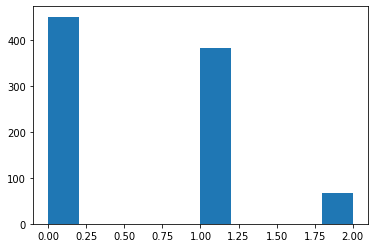

sales


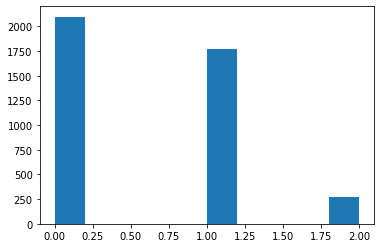

support


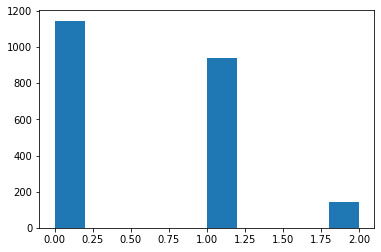

technical


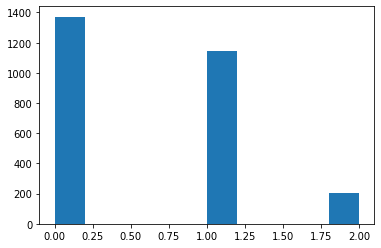

In [22]:
for i in gr1['sales']:
    print(i)
    a1=data[data['sales']==i]
    plt.hist(a1['salary'])
    plt.show()              


In [23]:
data1=data.drop(['sales'], axis='columns', inplace=False)
data1['salary']=data1['salary'].astype('int')
data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0


In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null int32
dtypes: float64(2), int32(1), int64(6)
memory usage: 996.1 KB


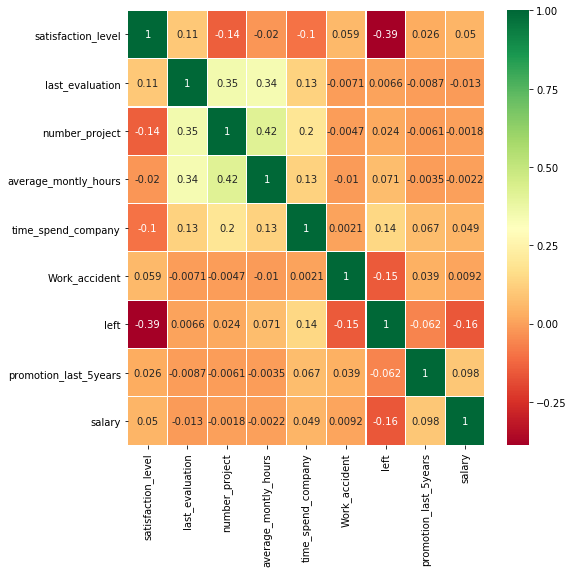

In [25]:
sns.heatmap(data1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Видна обратная зависимость между признаком увольнения и уровнем удовлетворенности. Т.к. признак увольнения - 1, соответствует небольшим уровням удовлетворенности.
И что интересно - размер зарплаты не коррелирует ни с одним из доступных показателей.

9.Сколько сотрудников покинули компанию.

In [26]:
data.groupby('left', as_index=False).count()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,1,3571,3571,3571,3571,3571,3571,3571,3571,3571


Компанию покинул 3 571 сотрудник

In [27]:
data.groupby(['sales','left'], as_index=False).count()

,sales,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,IT,0,954,954,954,954,954,954,954,954
1,IT,1,273,273,273,273,273,273,273,273
2,RandD,0,666,666,666,666,666,666,666,666
3,RandD,1,121,121,121,121,121,121,121,121
4,accounting,0,563,563,563,563,563,563,563,563
5,accounting,1,204,204,204,204,204,204,204,204
6,hr,0,524,524,524,524,524,524,524,524
7,hr,1,215,215,215,215,215,215,215,215
8,management,0,539,539,539,539,539,539,539,539
9,management,1,91,91,91,91,91,91,91,91


10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

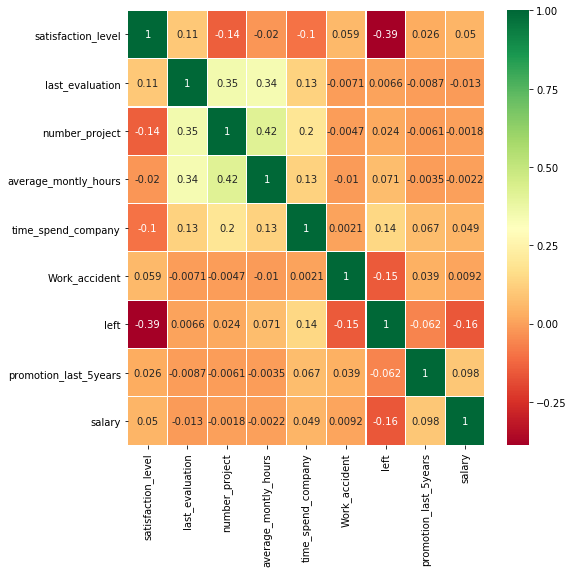

In [28]:
sns.heatmap(data1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Видна незначительная 39% обратная зависимость между признаком увольнения и уровнем удовлетворенности, т.к. признак увольнения - 1, соответствует небольшим уровням удовлетворенности. И что интересно - размер зарплаты не коррелирует ни с одним из доступных показателей.
Также ранее отмечалась некая прямая зависимость с корреляцией 42% роста среднемесячных часов выработки и роста номера проекта.
Прочие существенные зависимости показателей отсутствуют.

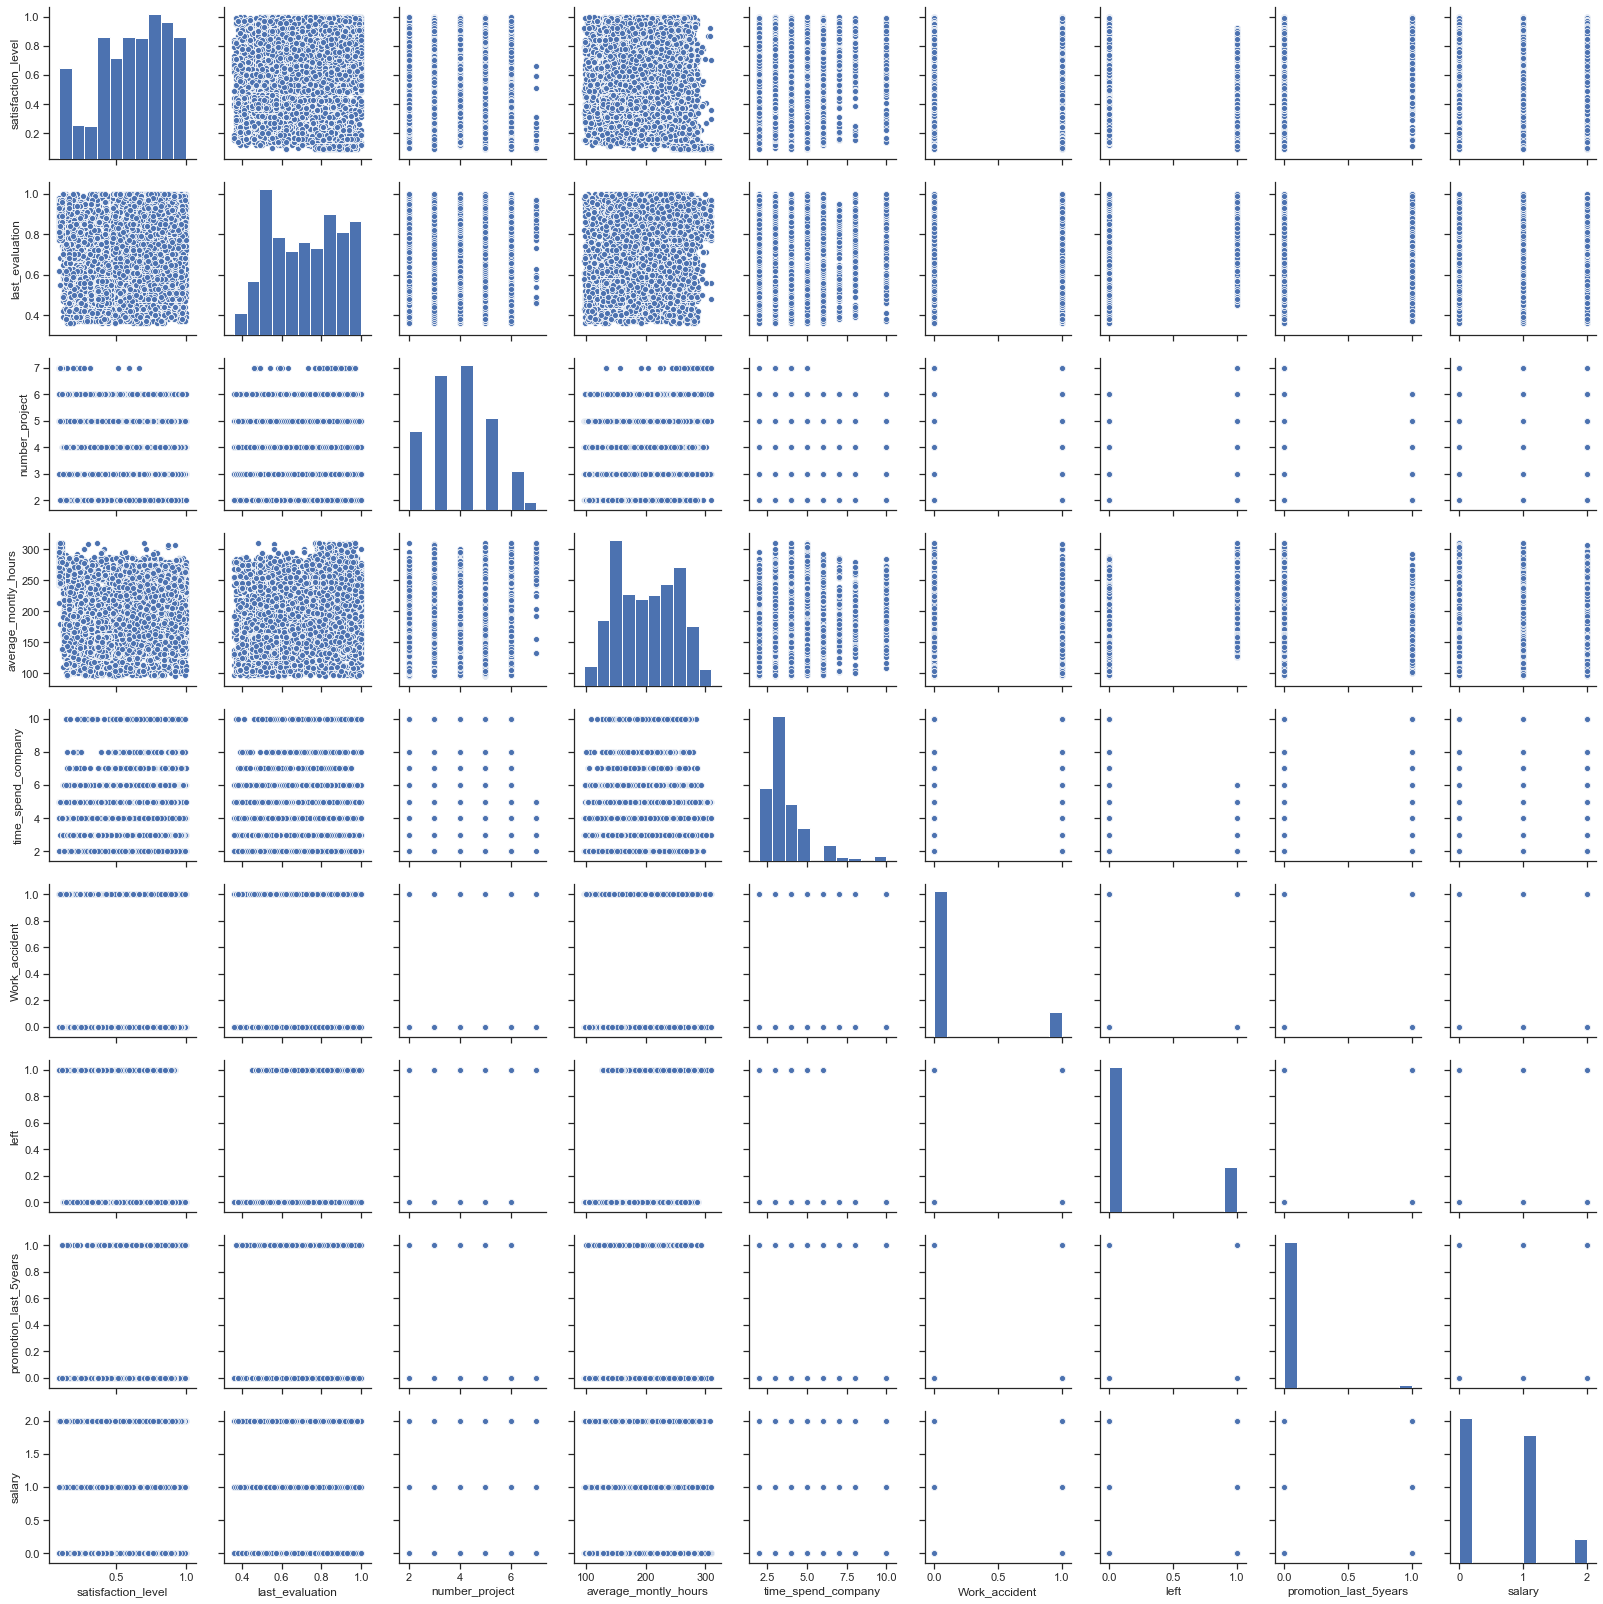

In [29]:
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(data1)